In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import os
os.chdir('../')

In [14]:
from src.numpy_encode import *
from src.config import *
from src.music_transformer import *
from src.multitask_transformer import *
from src.utils import midifile

In [15]:
vocab = MusicVocab.create()

In [16]:
midi_file = Path('maestro-v2.0.0/2018/MIDI-Unprocessed_Schubert1-3_MID--AUDIO_05_R2_2018_wav.midi')

In [18]:
item = MusicItem.from_file(midi_file, vocab)

In [21]:
item.to_tensor().size()

torch.Size([34176])

In [22]:
mf = midifile.file2mf(midi_file)

In [24]:
mf[0]

TypeError: 'MidiFile' object is not subscriptable

In [25]:
stream = file2stream(mf)

In [26]:
stream.show('midi')

In [27]:
chordarr = stream2chordarr(stream); chordarr.shape

(13949, 1, 128)

In [46]:
chordarr[10]

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.]])

In [32]:
ts1 = chordarr[10].nonzero(); ts1

(array([0, 0, 0, 0, 0]), array([36, 48, 51, 55, 60]))

In [33]:
c = music21.chord.Chord(ts1[1].tolist()); c

<music21.chord.Chord C2 C3 E-3 G3 C4>

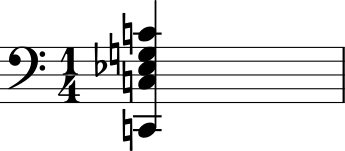

In [34]:
c.show()

In [35]:
npenc = chordarr2npenc(chordarr); npenc.shape

(17087, 2)